---
> *Epigraph*\
> 申命記4章10節\
> 「（中略）わたしは彼らにわたしのことばを聞かせよう。それによって彼らが地上に生きている日の間、わたしを恐れることを学び、また彼らがその子どもたちに教えることができるように。」
---

# 機械学習の基礎

## 機械学習とは？

機械学習は、明示的にプログラミングを行わず計算機に学習能力を与える手法

- コンピュータがデータから学習することで、そのデータに含まれる規則や判断基準などのパターンを抽出する**関数**を獲得する

- 獲得した**関数**を用いて新たなデータについても予測できる
  - 画像認識・音声認識・文書分類・医療診断・スパムメール検知・商品推薦など幅広い分野で応用
  - 例えばスパムメールでは、迷惑メール(スパム)と、通常のメール(ハム)を識別するが、メールとスパムかハムかの結果や基準があれば未知のメールも識別できる

- システムが学習のために使うデータ例のことを訓練セット(training set)と呼ぶ
- 個々のデータ例のことを訓練インスタンス(training instance)あるいは標本(sample)サンプルと呼ぶ

## 機械学習の特徴

アルゴリズムを明確に与えるわけではない
 - 何かしらのモデルは与えるが、そのモデルにおける特徴量を自動的に調整し続けることができる
 - つまり、変化や多様性に対して柔軟

従来のアプローチでは複雑になりすぎる問題や既知のアルゴリズムがわかっていない問題でも力を発揮  
- これが例えば音声認識や画像認識などの分野で注目されている理由
- スパムフイルタの場合、タスク$T$とは新しいメールにスパムのフラグを付けるかどうかを判断することで、経験$E$は訓練データ、性能指標$P$は例えば正しく分類されたメールの割合が該当
  - この性能指標として、例えば精度(accuracy)があり、分類のタスクでよく使われる

## 機械学習におけるモデル・パラメータ・入力変数・目的関数・損失関数・コスト関数

学習によって獲得される関数（ **モデル** ）は **パラメータ** で表現され、パラメータを決めればその関数の挙動が決まる

最も単純な例として直線の関数を考えると、傾き$a$と切点$b$の２つのパラメータで特徴づけられ、$f(x; a, b) = ax + b$と表記できる

- ここで$x$ は関数の **入力変数** と呼び、また $；$ の後ろにパラメータを表記する
- なお、当然であるが1次式かどうかも含めてパラメータで表現する

機械学習の目標は、学習データを使ってこれらのパラメータを決定すること
- 学習処理とは**目的関数**を最小化（または最大化）することで学習、つまり望ましい挙動をするようなパラメータを決定する処理のこと

目的関数は、モデルの出力値が望ましい場合には小さな（または大きな）値をとり、そうでない場合は大きな（または小さな）値をとるように設計する

例えば，学習データとして入力と出力のペアからなるデータセット
$D=((x_1, y_1), (x_2, y_2), \ldots, (x_n, y_n))$
が与えられたとする
- ここで$x_{i}$は$i$番目のサンプルの入力、$y_{i}$は$i$番目のサンプルの出力を表す

- これらの点の近くをできる限り通るような直線$f(x; a, b)=ax+b$を求めるとする
- このレベルでは機械学習と呼ぶかどうかは議論があるが、与えられたデータセットから最も適切と思われる直線を発見的に探すのであれば、機械学習といえる

出力が実数値の場合、パラメータ$\theta=(a, b)$とおいて、モデルの予測値$f(x_i;\theta)$と正解$y_i$との二乗誤差を求め、その合計値で「外れ度合い」を評価できる

- すなわち、次のような目的関数がよく利用される\
$$L(f(x_i;\theta), y_i)=\sum_{i=1}^n (y_i - f(x_i;\theta))^2$$

- この関数を最小化することを考える

- 全てのデータで予測と正解が一致する時のみ$0$となり、それ以外は外れ度合いが大きくなるほど大きな正の値をとる

このような「外れ度合い」「間違え度合い」を測る関数を、特に **損失関数 (Loss Function)** と呼ぶ
- もちろん、損失関数は様々な形があり、方法によっても異なる
- 損失関数は目的関数としても利用可能であり、目的関数とほぼ同じ意味で利用されるが、正確には異なる

また、与えられたデータセット全体に対するペナルティ(正則化)の合計値を求めるような目的関数を特に **コスト関数 (Cost Function)**と呼び、損失関数よりもより一般的な意味で用いられる

目的関数は、上記のように損失関数やコスト関数よりもさらに一般的な用語である

- 目的関数の引数は$\theta$であり、目的関数を最小化する最適な$\theta$を求めることで、データセット$D$を精度良く予測する関数$f(x;\theta)$が得られる

目的関数の最小化問題を解くためには微分と線形代数の知識が必要となる

以降、理解に必要な最低限の知識について述べる

### 標準偏差を利用したスケーリング

機械学習アルゴリズムにおける前処理として頻繁にスケーリングが行われる。例えば、スケールが異なる変数 $x_{1}, x_{2}$、$x_1=(100,0.1), x_2=(1000,1)$とする
- ここで、縦軸と横軸のスケールが大きく異なっていることに注意する

この２点間の距離 $d$ は、

$$
\begin{aligned}
d&=\sqrt {\left( 100-1000\right) ^{2}+\left( 0.1-1\right) ^{2}}\\
&= \sqrt {810000.81}
\end{aligned}
$$

距離$d$において$x_{1}$の影響量が大きく$x_{2}$ は殆ど影響を与えていない

すると、$x_{2}$ のデータとしての意味が薄れ、考慮することが困難となる\
そこで、**スケーリング**を行う

- **最小値0**，**最大値1**にスケーリング

 最小値 $x_{\min}$ と最大値 $x_{\max}$ を求め、全データについて、
$$
\widetilde{x} = \dfrac{x - x_{\min}}{x_{\max} - x_{\min}}
$$
を求めればスケーリングが行われる
  - 計算が単純であるが、外れ値の影響が大きくなる

- **平均0**，**標準偏差1** にスケーリング

 この方法は、**標準化（正規化）** とよばれ、全てのデータから平均を引くと平均$0$になり，標準偏差で割ると標準偏差は$1$となる
$$
\widetilde{x}  = \dfrac{x - \bar{x}}{\sigma}
$$
としてデータが変換される
  - 外れ値に強いスケーリングが行われる

# データの扱い

## データを扱う上で注意するべき点

次の点に注意すること。
- データの形式は何か？
 - 特徴量はなにか？
   - どのように特徴量を抽出するのか？
 - 数値データ（量的）
 - カテゴリデータ（質的）
   - カテゴリデータを数値データへ変換
- 欠損値をどうするか？
  - 取捨選択・置換・補完
- 正規化するかどうか？
- 次元（特徴量の数）をどうするか？
 - どのように選択するのか？
- データの量は十分か
 - 最も大事な要素

### 外れ値除去

時間で変動するデータについて、その値が異常かどうかを判断したいとする
- なお、長時間観察した際のデータの平均的な値は一定で、値はランダムに変動するとする
- 時間的に変動する場合は、事前にその変動分を取り除く等の前処理を施しておく

このデータに対して、外れ値である異常データを検出する手法はいくつかあるが、その一つに値の**頻度**に着目する方法がある

<img src="http://class.west.sd.keio.ac.jp/dataai/text/1-18.png">

このように変動するデータがある場合、平均で線を引き、それぞれの値における頻度を算出しヒストグラムを作成すると正規分布が現れる場合が多い
- 実際にデータが正規分布に従うかどうかを統計的に確認したい場合は、正規性検定などの方法がある

正規分布に従う場合、外れ値を定義するためにデータの平均 $\mu$ と標準偏差 $\sigma$ を算出し、$\mu \pm 3\sigma$の値に線を引けば**3σ法**と呼ばれる外れ値除去を行うことができる

この手法は、外れ値の回数が多い場合や、外れ値が極端な値を持つ場合は、平均や標準偏差の値そのものが、その外れ値の影響を大きく受ける
- 結果として、外れ値をうまく除去できなくなるが、例えばデータを大きい順に並べて上位5%，下位5%を取り除くなど、事前処理を施すことで対応することができる

このような手法は、データを知り、そのデータにあった事前処理を、必要に応じて施すセンスが必要であり、よく知られた、もしくは知っておくき手法がいくつかある一方で、自ら工夫して適切な前処理を施すことも必要となる

これこそが、データサイエンティストが備えるべき技能といえる

次に、このような観点でデータの扱いと学習について簡単に述べる

醜いアヒルの子を含む $n$匹のアヒルがいるとする
- このとき，醜いアヒルの子と普通のアヒルの子の類似性は、任意の二匹の普通のアヒルの子の間の類似性と同じになるという定理

おそらく、醜いアヒルの子は黒いのだから、色を特徴量にしてすぐに区別できるであろう、と考えるであろうが、それには人間の背景知識が利用されている

$n$匹のアヒルの子を区別するためには$F=log(n)$個の二値の特徴量を使う
- これはトーナメントを考えればよく、一つの特徴量が集団を2分し、それぞれの集団を新しい特徴量がまた2分し、と考えることを意味する

これらの特徴量を用いて分類しようとすると、これらの特徴量のどれに合致するかの数、つまり特徴そのものではなく、特徴に合致した数による分類とならざるを得ない
- 醜いアヒルの子の数に特徴がなければ、どれも同じになり、区別できない
- 言い方を変えれば、醜いアヒルの子と同じように他のアヒルも独特なのだ、醜いアヒルの子と普通のアヒルの子は、他のアヒルの子とも同じくらい類似しているのだ、ということを意味している

哲学的であるが、具体化してみると、次の通りである
- $a, b, c, d, e, f, g, h$の8匹のアヒルがあり、これを特徴量で区別する
- この時、$K=log(8)=3$となる
- 特徴量は、例えば羽の色の明るさかもしれないが、色情報RGBの値であったり、大きさであったり、食事量であったり、遺伝子の変異であったり、様々想定される
- ある特徴量$s_0$で、$[a, b, c, d]$と$[e, f, g, h]$に区別できる
- 別の特徴量$s_{00}$と$s_{01}$を用いるとそれぞれ2分され、$[a,b], [c, d], [e, f], [g, h]$に分類できる
- $s_{000}, s_{001}, s_{010}, s_{011}$を用いることで全てバラバラに分類できる
- ここで、利用した特徴量の数は7個であり、これは$N=2^n-1$、つまり、$7=2^3-1$となる

ここでもう一つ仮定を加える

例えば、$s_{00}$は、$[a, b, c, d]$を$[a, b]$と$[c, d]$を分けるが、ここに含まれない$[e, f, g, h]$に対してどのように合致するかは言及していない

以後の説明のため、ここではどれにも合致しないつまり、$[e, f, g, h]$には含まれない特徴と仮定する
- 仮にそうであっても、この定理の根底には関わらない

さて、ここでaが見にくいアヒルであったとする
- 醜いアヒルの子であるaを識別できた特徴量の数は、$s_0, s_{00}, s_{000}$の$ 3 $つである

ところが、b, c, d, e, f全てについて、これらを識別できた特徴量の数は等しく$3$となることから、醜いアヒルの子を特別扱いしているが、実はすべてのアヒルについて同様に独自であるといえるであろう

色の違いを大きな違いと考える「人間」が持つ背景知識に基づいているだけで、数論的にはそのような背景知識は意味がない
- 醜いアヒルの子を特徴づけるためには、その目的に適した特徴量の設計が重要であることを示している


# 機械学習の分類

## 教師あり学習と教師なし学習

機械学習の分類には、様々あるが、最も大きな分類は教師あり学習と、教師なし学習である。まずは、この分類について抑える。

### 教師あり学習(supervised learning)

データが入力と出力により構成される

教師あり学習は､予測子(predictor)と呼ばれる一連の特徴量(feature)からターゲット(target)の数値を予測する回帰(regression)タスクでも使われる

あるデータを教師データとして学習させて、未知の入力に対して「正解」と判断できる出力を得ることができる

たとえば、ロジスティック回帰(logistic regression)は一般に分類に用いるが、特定の分類に属する確率の数値（たとえば「20％の確率でスパム｣）といった判定に利用することもできる

次のような手法がある

 - クラスタリング
 - 線形モデル
 - ロジスティック回帰
 - 判別分析
 - K近傍法
 - 決定木
 - サポートベクターマシン
 - ニューラルネットワーク
 - ベイズ
 - ランダムフォレスト等

### 教師なし学習(unsupervised learning)

データは入力のみで、以下のような手法がある

- クラスタリング
 - k平均
 - 階層型クラスタ分析
- 頻出パタンマイニング
- 外れ値検出
- 相関ルール学習
 - アプリオリ

例えば 売上記録に対して相関ルール分析を行うと、バーベキューソースとポテトチップを買う人はステーキ肉も買っていくなどといった関連が取得できるため、これらの商品を近くに配置すると売上増が期待できる

#### その他

他にも様々な機械学習手法がある。

- 半教師\
半教師あり学習とは、一部のデータのみラベルがつけられているデータを扱う場合に用いられる手法である

- 特徴量エンジニアリング\
特徴量エンジニアリングは、機械学習モデルのパフォーマンスを向上させるために、特徴量と呼ばれる追加の予測因子を構築してデータセットに追加すること

 - Sparce Coding

 - 次元削減など


- その他、深層(Deep)、能動(Active)、逐次(sequential)、転移(transfer)、強化(rainforcement)、模倣(Imitation)、連帯(federation)、GANなど
 - 能動学習=全てではなく確度の少ない一部だけラベル付けする
 - 逐次学習=データは逐次的に与えられ、そのたびにパラメータを更新する
 - 転移学習=学習済みモデルの一部、一般に最後の層に限定して再学習を行うことで少ないデータで効率よく学習させる
 - 強化学習=試行錯誤を通じて「価値を最大化するような行動」を学習する
 - 連帯学習=モデル構築に必要なデータを一か所に集めて学習させるのではなく、分散された端末において学習も行い、その改善情報のみを集めることで全体の精度を高めようという試みで、特にプライバシが懸念される場合に重要視される
   - 最近 Swam Learning(群れ学習)なども出てきた
 - 敵対的生成ネットワーク(Generative Adversarial Network)=例えばフェイクを作るGeneratorと、フェイクと現物を見抜くDiscriminatorが相互に学習することで極めて現物に近いフェイクを生み出すような学習手法
- ハイブリッド学習
複数の学習結果を総合的に扱う手法

- 強化学習
  - 学習システム(この分野ではエージェントagentと呼ぶ)が観察した環境に従って行動を選択して実行し、報酬(reward)もしくはペナルティ(penalty)を受ける場合もある)。エージェントは方策(policy)と呼ばれる最良の戦略を学習し、高い報酬を得るようになる。AlphaGoも強化学習に従う。ロボットの歩行などにも使われ、モデルベースの歩行手法よりも高い性能を得たためモデルベースアプローチは下火になった

## ディープラーニング(深層学習)


### 種類
- ディープニューラルネットワーク  
パターン認識を行うニューラルネットワーク（NN）の多層構造
- 畳み込みニューラルネットワーク (Convolusional: CNN)
画像を扱うDNNの初期層などによく利用され、高い画像認識能力を有する
- 回帰型ニューラルネットワーク(Recurrent: RNN)
音声、動画データなど可変長データに対応、音声認識、動画認識、自然言語処理が得意で、LSTM、GRU、LSTNetなどが著名
- その他様々なモデルが存在

### 得意なこと
- 画像認識、様々あるが著名なところではYoLoなど。物体認識の他、セグメンテーションと呼ばれる領域判別などがある
- 音声認識
- 自然言語処理
- 異常検知

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/dlhier.png" width="50%">

## バッチ学習とオンライン学習


### バッチ学習
バッチ学習では訓練時にすべての訓練データを与える\
あるまとまったデータを用いて一通りの学習を行うまとまった1プロセスをバッチと呼ぶ

### オンライン学習
オンライン学習ではひとつづつ、あるいはミニバッチ(mini-batch)と呼ばれる小さなグループで逐次的に訓練することで、学習が進む\
データが届くたびに学習が行われることから、オンラインと呼ばれる

バッチ学習でも時間をかけて、データを更新しつつ行えば、広義にはオンライン学習といえる\
古いデータを省いて学習させるのは当然であろうし、計算が比較的すぐに終わるのであればオンラインと呼べる場合もある

# 機械学習の勘所

## 万能なアルゴリズムは存在しない(ノーフリーランチ定理)

教師ありの機械学習モデルに対するノーフリーランチ定理は、数学者のDavid H. Wolpert氏が1996年の論文の中で次のように提示したことに始まる

原文:
> We have dubbed the associated results NFL theorems because they demonstrate that if an algorithm performs well on a certain class of problems then it necessarily pays for that with degraded performance on the set of all remaining problems.

DeepLによる機械翻訳
> 我々は、アルゴリズムが特定のクラスの問題で優れた性能を発揮する場合、残りのすべての問題の集合で性能が低下し、その代償を支払う必要があることを示しているので、関連する結果をNFL定理と呼んでいます。

すなわち、「あらゆる問題で性能の良い汎用的学習機は実現不可能であり、ある問題に特殊化された手法に勝てない」ということを意味する
- これは、過学習とも関係する。過学習が進むと、教師データに特化され、汎化性能が低下する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/no-free-lunch.jpg" width="80%">

その他、探索／最適化のアルゴリズムに対するノーフリーランチ定理は、David H. Wolpert氏とWilliam G. Macready氏が1997年の論文で提示している

その後多くの研究者が、様々な形でノーフリーランチ定理を証明／実証した

つまり、全てのコスト関数（＝価値基準）を最適にするアルゴリズムは存在しないことを意味している
- 問題領域の知識を可能な限り使用して最適化すべきであり
- 目的に適したアルゴリズムの選択が重要である

これは、第4の冬の時代を生み出すに十分な限界を見せているのではないか？という考えもある
- まともに解釈すれば、人間がもつ万能性は今の方法では獲得できないのだ、ということになる

## 分析





### アルゴリズムの選択
ノーフリーランチ定理が示すように、アルゴリズムの選択は重要
- とはいえ、アルゴリズムだけが悪いのではない！




### ハイパーパラメータの最適化

アルゴリズムを選んだ後も、ハイパーパラメータをどうするかは重要な問題

- グリッドサーチ：各パラメータを変化させて最も性能のよいパラメータの組み合わせを選択

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/gridsearch.jpg" width=300>

- DNNでは網の形状や学習率なども重要
  - 全結合ネットワークで深いネットワークを作るなど無意味なことはしない

## 過学習

適切にデータを前処理、適切なアルゴリズム、適切なハイパーパラメータにより誤差0、F値1になった
これは完璧なモデルと呼べるか？

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/exceed.png" width="70%">

本来求めたいのは次の関数ではないか？

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/good.png" width="45%">

本来求めたい結果の方がAccuracyが低くなるのが問題

### 過学習とはどういう状態か

欲しいモデルとは異なる、あるデータだけに特化したモデルが構築された状態のこと
- つまり、与えられたデータに、ノイズも含めて過度に適合し、訓練誤差は小さいが、未知データに対する性能が低下した状態

学習曲線、検証曲線、ロス曲線において、学習データのロスとテストデータのロスの間が開いている状態を過学習状態と呼ぶ

- ただし、学習があまり進んでいない状態で開いている場合は、モデル構築が不十分で、未学習(アンダーフィッティング)というべき状態であり、過学習(オーバーフィッティング)とは言わない

- 学習がある程度進んだ状態で呼ぶ

<img src="http://class.west.sd.keio.ac.jp/dataai/text/losscurve.png" width="60%">


### 対策
未知データに対する性能（汎用性能）を定量化した汎用誤差を小さくすることが重要
- 正則化：複雑さが増すことに対するペナルティを設ける
- 交差検証：データを学習用と評価用に分割  
例えば、データ全体をランダムにブロック(ここではAからE)に分けて、青のブロックのデータを用いて学習、赤のブロックのデータを用いて評価、この作業を繰り返す  
  - ただし、すべてのデータを使って学習させるため、汎化性能を検証する場合は、学習に含まれない検証だけで用いるデータを別途用意するべき

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/cross.jpg" width="20%">


## 学習曲線
学習曲線は、訓練データのサンプル数と予測性能の関係を示したグラフのこと
- 訓練データの数を変化させながら学習と検証を行い、それぞれの評価指標をサンプル数と共にプロットして得られる
- 理想的なモデルであれば、サンプル数を大きくしたとき、学習データに対する予測精度と評価データに対する予測精度がほぼ同じ値に漸近する
- その漸近される値があらかじめ設定した精度よりも高ければ、そのモデルがうまく作られていることを意味する

<img src="http://class.west.sd.keio.ac.jp/dataai/text/learning_curve.png" width=300>

- 訓練データが少ない場合は、予測モデルは訓練データそのものを表現する傾向があり、結果として予測性能は高くなるが、未知のデータに対してする予測性能は低くなることが多い

- 訓練データが増えると、データに共通する特徴をうまく学習するようになる結果、訓練データ一つ一つへの対応はうまくいかないが、平均して性能が高くなるようなモデルが生成されることが多い

なお、学習曲線を評価に用いるケースは稀である
- 上記ように学習曲線の横軸はサンプルサイズであり、実はサンプルサイズを変化させて学習させることはあまりない

## 検証曲線・ロス曲線
- 訓練におけるミニバッチやサンプルを重ねていった場合の、それぞれの評価指標やロスの値をサンプル数などと共にプロットして得られるグラフのこと
  - 正答率といった評価指標やロス関数の出力値を時系列で表したグラフ
- サンプル毎の値はミニバッチなどを用いる実際の学習形態では得られないため、イテレーション、エポック毎となる
- 正解率は別途計算しなければならないためコストが伴うが、ロス関数の値は逆誤差伝播法で必ず求めるため、ロス関数(損失関数)の値、つまり損失曲線がしばしば用いられる
- 損失曲線を学習曲線と混同するケースも見られるため、注意が必要

<img src="http://class.west.sd.keio.ac.jp/dataai/text/haGpo.png" width=300>

<img src="http://class.west.sd.keio.ac.jp/dataai/text/4-Figure2-1.png" width=300>


広義には、学習が進むプロセスを把握できるグラフは、すべて学習曲線と呼称する
- 学習曲線は、予測モデルが過学習を起こしているのか、学習不足になっているのかを判断する助けになる

## ハイバイアスとハイバリアンス


### ハイバイアス
学習例を増やしても識別率が低く、訓練データのスコアとテストデータのスコアの差が小さいとき

**原因**：学習不足/過少学習(under training/learning)や適合不足(under fitting)の状態で、そもそも、モデルがあっていない、特徴量が少ない、特徴量の選択があっていないなど

**対策**：モデルを変える、特徴量を増やす

### ハイバリアンス
学習例を増やしても訓練データのスコアとテストデータのスコアの差が大きいとき

**原因**：過学習(over training/learning)、過剰適合/過適合(over fitting)の状態で、モデルはよさそうだが、全体を把握するに十分な学習量がなくデータが不足している場合や、特徴量が多すぎて全体が見通せていない場合など

**対策**：データを増やす、特徴量を減らす

<img src="http://class.west.sd.keio.ac.jp/dataai/text/learning_curve-4.png" width=700>


## 評価手法

### 回帰モデルの評価

ある二つの変数の関係を表す式のうち、統計的手法で推計された式を回帰式、あるいは回帰モデルと呼ぶ\
また、一方が他方をどの程度説明できるかを定量的に分析することを回帰分析という

その手法として次のような指標が用いられる

以下、共通して次の通りに定義する

- データの数：$n$
- 真の値：$y_1,\cdots,y_n$
- 予測した値：$f_1,\cdots,f_n$

#### 平均絶対誤差 (MAE:Mean Absolute Error）
単純に平均距離を求める指標
- これで十分な場合も多いが、絶対値を用いるため不連続性(微分可能性)を気にする場合もある

$$MAE={1 \over n} \sum^n_{k=1}{| f_i - y_i|}$$

#### 平均二乗誤差 (MSE:Mean Square Error)
最も一般的に用いられる指標
$$MSE={1 \over n} \sum^n_{k=1}{(f_i - y_i)}^2$$

#### 平均平方二乗誤差 (RMSE:Root Mean Square Error）  
RMSE と MAE は、ともによく使われる誤差の指標
- RMS Error、RMSD（Root Mean Square Deviation）などとも呼ばれる
- RMSE はMAE よりも外れ値を、よりシビアにとらえる
  - 数学的には、RMSEとMSE共にどちらも平均距離を捉えているように見えるが、評価上は「本来の平均である必要」は特にないた、つまり少ない計算量を好む傾向がありMSEがより一般的に用いられる

$$RMSE = \sqrt{{1 \over n} \sum^n_{k=1}(f_i - y_i)^2}$$

### 相対誤差
スケールの違う複数のデータについて差を評価する場合は、絶対誤差ではなく相対誤差を用いる

#### 平均絶対誤差率 (MAPE:Mean Absolute Percentage Error)
$$MAPE={100 \over n}\sum^n_{k=1}\left |{f_i−y_i \over y_i}\right |$$
- 100を省略する場合がある

#### 平均平方二乗誤差率 (RMSPE:Root Mean Square Percentage Error)
$$RMSPE=\sqrt{{100 \over n}\sum^n_{k=1}\left ({f_i−y_i \over y_i}\right )^2}$$
- 100を省略する場合がある

### 精度
>（正解数÷データ数）および誤差率

として求めるが、これだけで満足するのはもう終わり

例えば、千個の製品で10個が不良品（陽性）の場合、常に陰性と判定するモデルの精度は99%である
- これは良いモデルといえるであろうか

この場合、10個の不良品のうち、何%正しく不良品と判断したかが重要である
- 誤差率しか考えないのはもうやめよう

### 混同行列 (Confusion Matrix)

大前提(名前の様に混同しやすいが、この前提さえ覚えていれば混同しない)
- 予測したい事象が生じることを「陽性=Positive」、生じなかったことを「陰性=Negative」とする
- 予測が正解すると「真=True」、失敗すると「偽=False」
とする

機械の故障を予測する場合、故障が発生することが陽性=Positiveである、すると、

- 故障していると予測し、故障していた（真陽性=Ture Positive:TP）
- 故障していないと予測し、故障していなかった（真陰性=True Negative:TN）
- 故障していると予測したが、故障していなかった（偽陽性=False Positive:FP）
- 故障していないと予測したが、故障していた（偽陰性=False Negative:FN）

悪いこともPositiveになりえること、正解不正解、どのように予測したか、結果がどうであったかなど、複数の情報が混ざるため混乱しやすいが、慣れるしかない
- 実はシンプルな分類である
- とにかく大前提を抑えること

次の表はScikit-learnのconfusion_matrix関数の出力順に揃えてあるため、一般的な表とは異なります

表は様々あるため、TP, TN, FP, FNの意味で考えると誤りがない

| | | | |
|:-:|:-:|:-:|:-:|
| | | 予測値 |(モデルの予測)|
| | | 陰性(Negative) |  陽性(Positive)|
| 正解| 陰性 | 真陰性(True Negative) | 偽陽性(False Positive) |
|(実際のクラス)| 陽性 | 偽陰性(False Negative) | 真陽性(True Positive) |

- 真(True)はモデル予測が実際が一致したことを、偽(False)は誤ったことを表し、**予想が的中したかどうか**を表す
- 陽性か陰性かは**予測されたクラス**を表す

陽性であるということは、予想を行う方を表しており、故障を検出する場合は、故障を検出することが陽性、正しく動作していることを検出する場合は、正しく動作していることが陽性である


#### **正解率・正確さ(Accuracy)**

 全体のデータの中で正しく分類できたTPとTNがどれだけあるかの指標で、この値が大きいほど性能が良い
  - **算出式**: $(TP+TN)/(TP+FP+FN+TN)$

 要するに、$T/全体$ という式であり、一般的な指標である
  - 1から減ずると、不正解率と呼ぶ


#### **精度・適合率(Precision)**

 Positive と分類されたデータ(TP + FP)の中で実際にPositiveだったデータ(TP)数の割合
  - **算出式**: $TP/(TP+FP)$

 この値が大きいほど性能が良く、間違った分類が少ないということを意味する


#### **感度(Sensitivity)・検出率・再現率(Recall)・真陽性率(True Positive Rate)**

 本来Positiveと推測すべき全データからどの程度正しく判定できたかを表し、値が大きいほど性能が良い

  - **算出式**: $TP/(TP+FN)$

 取りこぼし無くPositive なデータを正しくPositiveと推測できたかの指標

  - 検出率と精度は対の関係にあり、一般的に精度を上げると検出率は下がる傾向にある点に注意する

 <img src='http://class.west.sd.keio.ac.jp/dataai/text/pre-re.png' width=300>

  - このバランスをみるには下記のF値を使う


#### **特異度(Specificity)・真陰性率(True Negative Rate)**

 取りこぼし無くNegative なデータを正しくNegativeと推測できたかの指標で、値が大きいほど性能がよい
 - **算出式**: $TN/(TN+FP)$

 Negativeと推測すべき全データの内、どれほど回収できたかを表す


#### **偽陽性率(False Positive Rate)**

 実際にはNegative であるサンプルの内、Positiveであると判定された割合で、この値が小さいほど性能が良い

  - **算出式**: $FP/(FP+TN)$

 アラートしてはいけないもののうち、アラートを出してしまったものの割合でもあるため、誤報率とも呼ばれる


#### **偽陰性率(False Negative Rate)**

 実際にはPositive であるサンプルの内、Negativeであると判定された割合で、この値が小さいほど性能が良い
 - **算出式**: $FN/(FN+TP)$


#### **F値**

 適合率と再現率の両方を組み合わせた調和平均で、再現率と適合率を一方に偏らせずに均等に評価したい場合に利用する
  - 値が大きいほど性能がよいといえるがその解釈は一概に言えない
  - **算出式**: $2×(適合率\times再現率)/(適合率＋再現率)$

まとめると、次のようになる

| | | |
|:-:|:-:|:-:|
||メリット|デメリット|
|正解率|最もシンプルで分かりやすい|クラスごとの評価データ数が著しく異なると不適切|
|再現率|取りこぼしを発見できる|過検知を発見できない|
|適合率|過検知を発見できる|取りこぼしを発見できない|
|F値|取りこぼしと過検知をどちらも均等に判断できる|数値の解釈が難しくなる|

例えば、1,000個の製品データ内の10個が不良品（陽性）の場合、常に陰性と判定するモデルの精度は99%、これは良いモデルか？については、次のように解釈できる
- 混同行列はScikit-learnの表記にに揃えました

| | | | |
|:-:|:-:|:-:|:-:|
| | | 予測 | |
| | | 陰性(Negative) |  陽性(Positive)|
| 正解| 陰性 | 真陰性(True Negative) 990 | 偽陽性(False Positive) 0 |
|         | 陽性 | 偽陰性(False Negative) 10 | 真陽性(True Positive) 0 |

つまり、精度は99%、適合率・再現率・F値は0となるため、正しく推測できていないという結果になる

なお、次のような表記の方が一般的には多い
- こちらの方が、適合率や再現率などの値を表現・理解しやすい

| | | | |
|:-:|:-:|:-:|:-:|
| | | 正解 | |
| | | 陽性(Positive) | 陰性(Negative)|
| 予測 | 陽性 | True Positive | False Positive |
|      | 陰性 | False Negative | True Negative |




#### コードによる確認

では実際に計算させよう

次のセルで、実際のP/Nおよび予測されたP/Nを入力する
- いろいろと試してみるとよいであろう

In [45]:
y_true = [0,0,0,0,0,1,1,1,1,1] # 実際のP/N
y_pred = [0,0,0,1,1,0,1,1,1,1] # 予測されたP/N

混同行列を表示させる

In [46]:
from sklearn.metrics import confusion_matrix
cmatrix = confusion_matrix(y_true,y_pred)
print(cmatrix)

[[3 2]
 [1 4]]


この表示順が TN, TP, FN, TPの順になっている
- これがそもそも混同の元になっているが、コード主義なのでscikit-leranの流儀にあくまでもそろえる

つまり、この行列表示と、上記の表記(再掲する)は合致する

- 他のテキストやwebの情報とは異なっている場合が多いので注意すること

| | | | |
|:-:|:-:|:-:|:-:|
| | | 予測値 |(モデルの予測)|
| | | 陰性(Negative) |  陽性(Positive)|
| 正解| 陰性 | 真陰性(True Negative) | 偽陽性(False Positive) |
|(実際のクラス)| 陽性 | 偽陰性(False Negative) | 真陽性(True Positive) |

この表を作成すると次のようになる






In [47]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel() #混同行列のそれぞれの結果を取得
print("TN", tn)
print("FP", fp)
print("FN", fn)
print("TP", tp)
print("Confusion Matrix")
print("\tPPred\tNPred")
print("NFact\t", tn, "\t", fp)
print("PFact\t", fn, "\t", tp)


TN 3
FP 2
FN 1
TP 4
Confusion Matrix
	PPred	NPred
NFact	 3 	 2
PFact	 1 	 4


Accuracyを求める

In [48]:
from sklearn.metrics import accuracy_score
print('Accuracy:', accuracy_score(y_true, y_pred))

Accuracy: 0.7


Precisionを求める

In [49]:
from sklearn.metrics import precision_score
print('Precision:', precision_score(y_true,y_pred))

Precision: 0.6666666666666666


Recallを求める

In [50]:
from sklearn.metrics import recall_score
print('Recall:', recall_score(y_true,y_pred))

Recall: 0.8


F1スコアを求める

In [51]:
from sklearn.metrics import f1_score
print('F1 score:', f1_score(y_true,y_pred))

F1 score: 0.7272727272727272


まとめて表示させる

In [52]:
from sklearn.metrics import classification_report
print("Classification report")
print(classification_report(y_true, y_pred))

Classification report
              precision    recall  f1-score   support

           0       0.75      0.60      0.67         5
           1       0.67      0.80      0.73         5

    accuracy                           0.70        10
   macro avg       0.71      0.70      0.70        10
weighted avg       0.71      0.70      0.70        10



#### 多クラス混同行列

故障か正常かの2値を扱ったが、物体認識などクラスが複数ある場合でも、正解・不正解を議論するのであれば、同様に各クラスについて混合行列を求めることができる

この場合、クラスごと、つまり物体のラベル毎に、それぞれ混合行列を求めることができ、上記の指標値も各クラスごとに算出できる

### ROC(Receiver Operating Characteristic) 曲線・AUC(Area Under the Curve)

2値分類で一般的に利用されているパフォーマンス計測のための可視化手法
- ROCは推測曲線と呼ばれ、縦軸にTPR(True Positive Rate)、横軸にFPR(False Positive Rate) の割合をプロットしたグラフ
- AUC(Area Under the Curve) はその曲線の下部分のエリアのことで、AUCの面積が大きいほど一般的に機械学習の性能が良い事を意味する

AUCが大きいということはすなわち機械学習モデルがNegative と推測すべきものを間違えてPositive と推測している傾向が少なく、Positive と推測すべきものをしっかりとPositive と推測できていることを意味する

 - 実際の機械学習モデルはPositiveかNegativeかの判定を0か1かの2極で行うわけではなく、例えばsoftmaxの結果など、一般的には0から1の間の値など、小数点も含む曖昧な値を用いて判断する
  - 手書き文字認識MNISTでも、何%で1とみなしたか？といった指標が与えられていたのを思い出してほしい
  - さらに、その値に閾値を与えて、より大きい場合はPositive、より小さい場合はNegativeと判断するか、比較して判断する



#### 機械の故障検知を例にROCを理解する

故障の原因にはいろいろあるため、様々な特徴量を捉え、実際に故障であったかどうかのラベルを与えたデータをもとに学習を行ったと仮定する
- ここで、故障の予兆現象(テストデータに相当し、ここでは要素とする)に名前を付けたとする(実際にそういうことができるかどうかは想定していない)

 また、それぞれの機械学習モデルの出力が次のようになったとする
- nが正常ラベル、pが異常ラベルとし、モデルの出力値で纏めてある
- ここでは全体で29の要素がある

> 0.1: $y_{n1}$  
> 0.2: $y_{n2}, y_{n3}$  
> 0.3: $y_{n4}, y_{n5}, y_{n6}$  
> 0.4: $y_{n7}, y_{n8}, y_{n9}, y_{p16}$  
> 0.5: $y_{n10}, y_{n11}, y_{n12}, y_{p14}, y_{p15}$  
> 0.6: $y_{n13}, y_{p10}, y_{p11}, y_{p12}, y_{p13}$  
> 0.7: $y_{p6}, y_{p7}, y_{p8}, y_{p9}$  
> 0.8: $y_{p3}, y_{p4}, y_{p5}$  
> 0.9: $y_{p1}, y_{p2}$  

グラフ化すると次の通り
- 重なりがなければ完全に分離が可能である

 <img src='http://class.west.sd.keio.ac.jp/dataai/text/tpfpfig.png' width=300>


閾値を操作した場合のTPR(再現率)とFPRをそれぞれ求めると次のようになる

| | | |
|:-:|:-:|:-:|
| $>=$ |TPR             | FPR    |
|0.1 |16/(16+0)=1     |13/(13+0)=1 |
|0.2 |16/(16+0)=1     |12/(12+1)=0.92 |
|0.3 |16/(16+0)=1     |10/(10+3)=0.77 |
|0.4 |16/(16+1)=1     | 7/(7+6)=0.54  |
|0.5 |15/(15+1)=0.94  | 4/(4+9)=0.31  |
|0.6 |13/(13+3)=0.81  | 1/(1+12)=0.08 |
|0.7 | 9/(9+7)=0.56  | 0/(0+13)=0 |
|0.8 | 5/(5+11)=0.31  | 0/(0+13)=0 |
|0.9 | 2/(2+14)=0.13  | 0/(0+13)=0 |

- 例えば0.5とすると、全ての$y_p$16個のうち$y_{p1}$から$y_{p13}$までの15個の予測に成功しているのでTPRは0.94、また、全13個の$y_n$のうち故障と判断した、つまり予測に失敗したのは$y_{n10}$以上の4個でFPRは0.31となる

これを閾値を変えてグラフにすると、次のようになる
- なお、この後自動的にROC曲線を記述する方法について述べるが、ここではその計算過程を明らかにするため、敢えて計算を行っている

<img src="http://class.west.sd.keio.ac.jp/dataai/text/roc1.png" width=400>

x軸の読みをFPR、y軸の読みをTPRとすることでROC曲線が取得できる

AUCはこのグラフにおけるx軸側の面積を表し0から1の値をとる
- 上に大きな凸が得られているほどAUCの値が大きく、正確に識別していることが期待できる

この例では、
- 図の左上に閾値0.5の点があり、TPR($y$軸の値)が0.94、FPR:($x$軸の値)が0.31である\
この閾値0.5の点が図の左上に位置しているため、高TPRかつ低FPRであることを意味し故障判定がそれなりにうまくいっていることがわかる
- 閾値0.6では、TPRが0.81、FPR:($x$軸の値)が0.08である\
FPRが下がりよくなるが、TPRも下がってしまう\
但し、相対的にFPRの下げ幅の方が大きいため誤検出より減らすという意味では選択としてもあり得る

このように閾値を変更すると、改善される一方で副作用もある
- ROC曲線・AUCは閾値の調整によって機械学習の性能がどのように変化するかも視覚的に理解できるため、2値分類機械学習モデルの性能を見るには有用である

閾値の調整はアプリケーションを見据えて戦略的に行うことが重要

#### ROCの形の解釈

##### $y=x$に近いROC曲線

ROC曲線が$y=x$のグラフに近い場合、正確に判定できていないことを意味し、より具体的には故障か正常かをサイコロを振って決めているような状況となる

機械学習としては学習失敗であり、ハイバイアスと同様の状況が想定される

<img src="http://class.west.sd.keio.ac.jp/dataai/text/roc2.png" width=300>

実際にランダムデータを生成して確認する

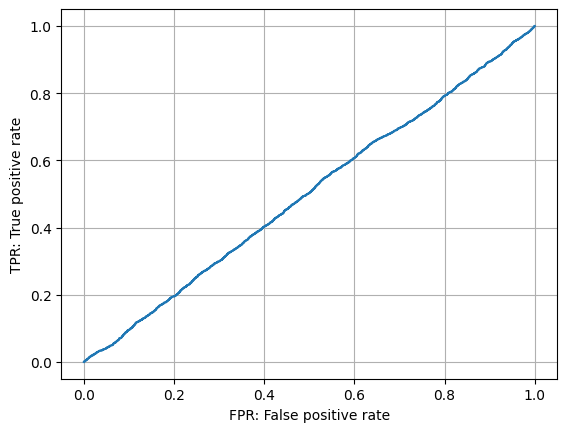

In [53]:
import numpy as np
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
np.random.seed(0)
y_true_random = np.array([0] * 5000 + [1] * 5000)
y_score_random = np.random.rand(10000)
roc_random = roc_curve(y_true_random, y_score_random)
plt.plot(roc_random[0], roc_random[1])
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

###### 下に凸であるROC 曲線

PositiveクラスとNegativeクラスが逆転しているケースで、天邪鬼学習

故障であれば正常と判定し、正常であれば故障と判定する状態であり、ラベルの入力ミスなどが疑われる
- 2値判定であるならば、単純に結果を反転してもよいであろう

<img src='http://class.west.sd.keio.ac.jp/dataai/text/roc3.png' width=50%>


##### あまりにも結果が良すぎるROC 曲線

結果が良いことに越したことはないが、あまりにも結果が良い場合、次の2つを疑う必要がある
- テストデータの入力を誤っていないか？トレーニングデータをそのままテストデータとして入力していないか？
- そもそも機械学習が必要であったか？線形分離可能であったり、モデルがシンプルであったのではないか？

<img src='http://class.west.sd.keio.ac.jp/dataai/text/roc4.png' width=50%>


##### 実際のROC曲線の例

必ず単調増加になる

<img src="http://class.west.sd.keio.ac.jp/dataai/scilearn/roc.jpg" width="40%">

なお、rocの形がよい、aucの値が大きいからと言って、必ずしも良い学習を行ったとはいえない
- 例えば、データが不均衡な場合は正しく判断できないため、別途F1値などを見る必要がある

これを解決するマシューズ相関係数が提案されている

実際に不均衡なデータを生成して確認する
- 5000個のデータを生成して、1が殆ど含まれないデータ、例えば5%にしたデータを生成
- このデータをtrainとtestに分割し、ロジスティック回帰で学習させる
- その結果をプロットすると、そこそこ良い結果がでている


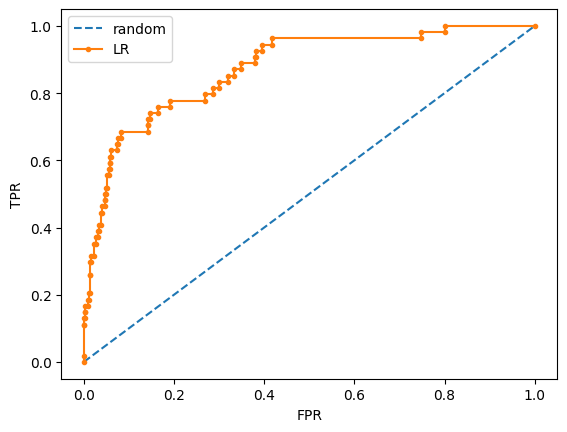

In [54]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
#次の行をいろいろ触ってみて、これ以降の結果がどのように変わるか確認するとよいであろう
X, y = make_classification(n_samples=5000, n_classes=2, weights=[0.95,0.05], random_state=42)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
model = LogisticRegression()
model.fit(trainX, trainy)
probs = model.predict_proba(testX)
probs = probs[:, 1]
fpr, tpr, thresholds = roc_curve(testy, probs)
plt.plot([0, 1], [0, 1], linestyle='--', label="random")
plt.plot(fpr, tpr, marker='.', label="LR")
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.show()
auc_score = roc_auc_score(testy, probs)

ところが、classification_reportを用いて実態を見てみると

In [55]:
predictions = model.predict(testX)
print(classification_report(testy, predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       946
           1       0.53      0.17      0.25        54

    accuracy                           0.95      1000
   macro avg       0.74      0.58      0.61      1000
weighted avg       0.93      0.95      0.93      1000



このように、1つまり少数であるデータのrecallやF1値は、0.17や0.25と極めて低い値になっていることがわかる

### マシューズ相関係数(MCC)とF1スコア

不均衡データ(imbalanced data)について評価するには、マシューズ相関係数(Matthews Correlation Coefficient)とF1_Scoreの利用が望ましい


#### F1スコア

まずF1値について、より詳細に説明する

> $2×(適合率(PRE)\times再現率(REC))/(適合率(PRE)＋再現率(REC))$

と記載したが、書き換えれば、
$F_1 = (\frac{REC^{-1}+PRE^{-1}}{2})^{-1}$
である

すなわち、適合率と再現率の調和平均で表される

さらに一般化した、$F_\beta$スコアは、
$$
F_\beta = (1+\beta^2)\frac{PRE\cdot REC}{(\beta^2\cdot PRE)+REC}
$$
と定義され、$\beta$を重みとして、$PRE$と$REC$の重点度合いを制御することができる
- $F_1$スコアは、$F_\beta$スコアにおいて、$\beta = 1$の場合を表す

#### MCCスコア

MCCは、真陽性(TP),偽陽性(FP),真陰性(TN),偽陰性(FN)を全て考慮し、かつ、クラスのサイズが大きく異なる場合でも使用できる分類モデルの評価指標である
- MCCは予測された2値分類の結果と正解の相関係数であり、予測と答えがどれだけ近いかを測る指標である
- 最悪-1~最善1までの値をとり、1は完璧な予測結果であったこと、0はランダムな予測結果であったこと、-1は予測結果と実際結果が完全不一致であったことを表す

MCCは次の式で与えられる

$$MCC=\frac{TP\cdot TN - FP\cdot FN}{\sqrt{(TP+FP)(TP+FN)(TN+FP)(TN+FN)}}$$

先ほどの不均衡データを用いて、これらの指標の値を求める

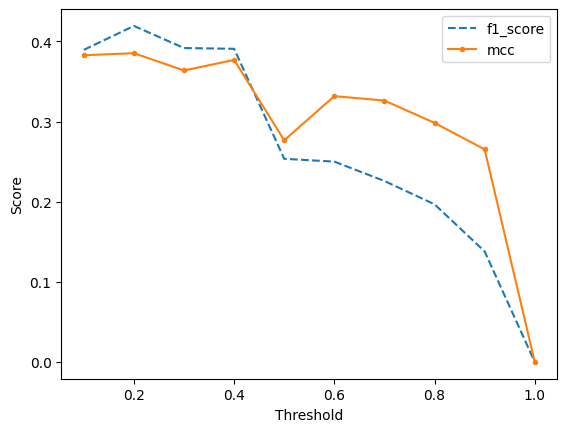

In [56]:
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
thresholds = np.linspace(0.1,1,num=10)
mcc_list = []
f1_list = []
for thr in thresholds:
    predict  = (probs > thr).astype(int)
    mcc = matthews_corrcoef(testy, predict)
    f1 = f1_score(testy, predict)
    mcc_list.append(mcc)
    f1_list.append(f1)
plt.plot(thresholds, f1_list, linestyle='--', label="f1_score")
plt.plot(thresholds, mcc_list, marker='.', label="mcc")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.show()

このようにスコアが芳しくないことがわかり、モデルの評価が行えていることがわかる
- F1値とMCCがほぼ同じような挙動をしめし、どちらでも判定可能であることがわかる

これらは、Positiveが少数であった場合であるが、逆にNegativeが少数であった場合、F1_scoreとMCCは異なる挙動を示す
- 次のように、F1値は良いモデルであるかのようなふるまいをするため、MCCで評価することが求められる

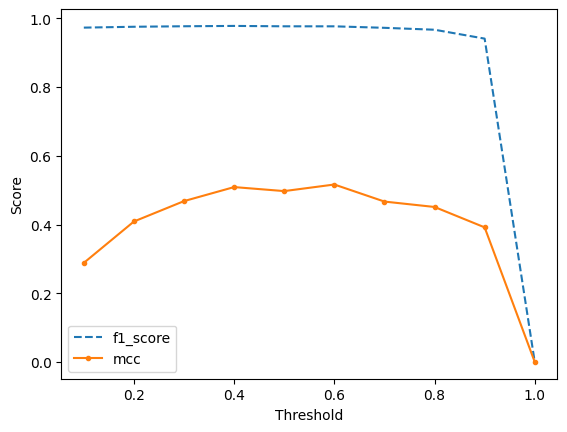

In [57]:
X, y = make_classification(n_samples=5000, n_classes=2, weights=[0.05,0.95], random_state=42)
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.2, random_state=2)
model = LogisticRegression()
model.fit(trainX, trainy)
probs = model.predict_proba(testX)
probs = probs[:, 1]
thresholds = np.linspace(0.1,1,num=10)
mcc_list = []
f1_list = []
for thr in thresholds:
    predict  = (probs > thr).astype(int)
    mcc = matthews_corrcoef(testy, predict)
    f1 = f1_score(testy, predict)
    mcc_list.append(mcc)
    f1_list.append(f1)
plt.plot(thresholds, f1_list, linestyle='--', label="f1_score")
plt.plot(thresholds, mcc_list, marker='.', label="mcc")
plt.legend()
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.show()

結局のところ、MCCが最も安全であるといえるが、残念ながらその解釈は最も直観的ではない

# 課題(混同行列)

次の問題に答えなさい
- 内容を理解すれば、問題はコピペで終わるはずです
- ノートブックには次の内容を先頭に必ず記述すること
- 先頭セルはテキストで、
「# **データシステムの知能化とデザイン**」と記載
- さらに「# 第2回課題」と記載
- 次に、「## 学籍番号」と「## 氏名」を記載

**これらのタイトルは、全ての課題に共通する事項である**

これ以降省略するが、**忘れずに記載すること**

今回は以下の問題に解答することを課題とする

## 問題

次の問題に応えなさい
- 解答は、Google Colaboratoryのノートブック形式でコードと結果をセルに記述し、LMSより提出しなさい
- ノートブックの名前は、「DataAI課題2.ipynb」とすること
- 全ての問題を一つのノートブックに含めなさい
- 解答には、「課題解答のための参考コード例」を参考にしなさい
  - なお、Google Colaboratoryを用い、プログラムされていれば特に言語は問わない
  - pythonによるプログラムを期待しているが、Google Colaboratoryには、pythonだけでなく、c言語に加え、R, ruby, perlなど様々な言語の設計環境が備わっており、GO言語などデフォルトで入っていない場合でも、aptを使ってワンコマンドで簡単にインストールできる
  - こうなれば、fortran, lisp, java, javascript, php, D言語, さらにはbash, cshシェルスクリプトを含む、プログラミング言語の範疇に入れば何でも用いてよい
  - 難読化されていなければ、すべて受け入れるので、言語や仕組みに何ら遠慮はいらない
- 純粋に混同行列の問題であって、機械学習の問題ではないことに注意しなさい
  - つまり、エクセルシートで、マクロを使わず表の式だけで解ける問題である

**(問題1)** 下記に示す検査Aと検査Bの2種類の「課題回答用データ」それぞれを用いて、混合行列より正解率、再現率、適合率、F値を各データ毎に求めなさい。なお、**検査A、検査B共に値が0.8よりも小さいときに疾患と判断する**

**(問題2)** 下記に示す2種類の「課題回答用データ」を用い、それぞれについてROC曲線を描きなさい

なお、値が小さいと疾患であるとみなすため若干の工夫が必要である

(ヒント)
- 問題1で「0.8よりも小さいときに疾患」としていますが、この0.8というはどうやって決めるのでしょうか？どうやれば適した値がでるのでしょうか？これを決定する作業が、ROCです。ROCを求めるためには、0.8ではない値を使って作成する必要がありますね。
- このROCを書けば、追加でAUCを求めることができます。AUCが求まれば、利用したモデルが適切かどうかがわかる、ということになります。

**(問題3)** AUC (Area Under the Curve)による面積をそれぞれ求めなさい

**(問題4)** 「課題回答用データ」に示した検査Aと検査Bは、どちらがより信頼できるといえるか、簡単な理由と共にテキストのセルとして答えなさい


## 課題回答用データ

今回利用するデータは、2種類の検査手法、検査Aと検査Bで疾患を発見できるかどうか、どちらの検査の方が正確かどうかを調査するために取得したとする

以下は、CSV形式です

次のデータは直接プログラムに記述してもよい
- 読み込み方を調べるなどしてcsvファイルを扱えるようであれば、http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv よりwgetでダウンロードして利用するプログラムを用いてもよい
  - 記述的な観点で妥協・遠慮する必要はない
  - ダウンロードしたファイルはフォルダに表示される
- 表示まで時間がかかる場合があるので注意すること

```
検査A,検査B,疾患
-2.475 ,-1.913 ,1
-2.436 ,-1.316 ,1
-1.630 ,-0.805 ,1
-1.333 ,-0.658 ,1
-0.964 ,-0.299 ,1
-0.960 ,-0.199 ,1
-0.780 ,0.162 ,1
-0.730 ,0.383 ,1
-0.432 ,0.412 ,1
-0.326 ,0.619 ,1
-0.261 ,0.692 ,1
0.173 ,0.824 ,1
0.575 ,1.578 ,1
0.743 ,1.764 ,1
1.682 ,1.801 ,1
-0.596 ,-0.602 ,0
-0.141 ,-0.172 ,0
0.103 ,-0.071 ,0
0.196 ,0.108 ,0
0.199 ,0.314 ,0
0.340 ,0.361 ,0
0.429 ,0.406 ,0
0.522 ,0.469 ,0
0.694 ,0.511 ,0
0.790 ,0.520 ,0
0.853 ,0.558 ,0
0.888 ,0.573 ,0
0.992 ,0.794 ,0
1.186 ,0.835 ,0
1.238 ,0.965 ,0
1.297 ,1.377 ,0
1.393 ,1.500 ,0
1.510 ,1.512 ,0
1.808 ,1.673 ,0
1.968 ,1.830 ,0
1.995 ,1.891 ,0
2.367 ,2.024 ,0
2.620 ,2.399 ,0
2.855 ,2.631 ,0
2.908 ,2.706 ,0
2.928 ,2.992 ,0
2.953 ,3.038 ,0
3.094 ,3.090 ,0
3.547 ,3.218 ,0
3.886 ,3.997 ,0
```

## 課題解答のための参考コード
まずは一般的な記述例を示す
- Pythonおよびscikit-learnを使って多クラス混同行列を作り、評価指標を計算する
  - なお、繰り返しとなるがGoogle Colaboratoryでコードを書く際は、日本語を用いてはならない

問題設定として、ここでは、あえて、多クラス混同行列を扱ってみよう
- 答えがコピペですぐに出るのは避けるためで、簡単なものを示して発展形を答えさせるのではなく、発展形を示して、簡単なものを答えさせるというパターンである

手でじゃんけんの型を提示し、これをAIで判別するという事例を想定する
- 教師データとして trainがあり、その予測データとして resultがある
- このデータはラベルで入っているため数値化が必要であるが、ラベルを1, 2, 3という数字に変換する際の数字とラベルの対応をとるための行列がnameである


課題は2値によるシンプルな混同行列であり、下記よりも簡単に求めることができる
- ここでは、csvファイルを読み込むといったことは考えず、上記データをコピペしてそのままpythonの配列に入れてしまうという「ビッグデータでは絶対に無理だが、とりあえず初心者が好きそうな方法」になる
  - 大ヒントを出せば、trainは、データから結局PositiveかNegativeが判断できるのだから、0と1で埋めればよいし、resultも同様で、さらにnameは全部不要
  - 数字だけ埋めれば、下記10行程度で課題は終わる

In [58]:
train = ["Gu","Choki","Pa","Pa","Pa","Pa","Gu","Choki","Pa","Gu"]
result = ["Gu","Choki","Pa","Choki","Choki","Choki","Gu","Pa","Gu","Gu"]
name = ["Gu","Choki","Pa"]

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
val_mat = confusion_matrix(train, result, labels=name)
val_mat

array([[3, 0, 0],
       [0, 1, 1],
       [1, 3, 1]])

但し、上記の方法では、ROCが求められない
- この方法でROCはできませんでした！といった演習レポートを作成しても、点数(4/5点)はもらえます

もし、卒業論文発表のデータ解析で文句を言われることがないようにしたい、レポート満点を目指したいならば、より実践的な例として、以下のコードを参考にレポートを作成するとよい
- なお、混合行列の値が出ることから、そこから計算で正解率、再現率、適合率、F値を求めることができる
  - 各自やってみるとよいであろう

## さらに実践的な参考コード
(ここでも、コピペは困るので)さらに実践的な課題として、学習結果がsoftmaxによる値、つまり学習結果としての何%正しいとみなしたかという「確度」で示されているとする
  - つまり、resultとしては、最も確率の高いじゃんけんの型を出すことになる
  - argmaxは、配列から最も値の大きい列を返す関数であり、argmaxを用いて0, 1, 2の値へ変換できる

trainは、じゃんけんの型それぞれについて、どれを出したかを0か1かで記載されている
- これも、0, 1, 2に変換しなければならないが、同様にargmaxで変換できる

In [59]:
result = [
    [0.1, 0.2, 0.7],
    [0.5, 0.3, 0.3],
    [0.2, 0.3, 0.2],
    [0.2, 0.7, 0.2],
    [0.2, 0.5, 0.2]
]
train = [
    [0, 0, 1],
    [1, 0, 0],
    [0, 0, 1],
    [0, 0, 1],
    [0, 1, 0]
]

numpyのargmaxを使って正解を得る\
上記のじゃんけん例はargmaxによる値を示しているといえる

In [60]:
import numpy as np
resulta = [np.argmax(i) for i in result]
traina = [np.argmax(i) for i in train]
print(resulta)
print(traina)

[2, 0, 1, 1, 1]
[2, 0, 2, 2, 1]


In [61]:
conf_mat = confusion_matrix(traina, resulta)
conf_mat

array([[1, 0, 0],
       [0, 1, 0],
       [0, 2, 1]])

In [62]:
# このセルは本質ではないが、要素を取り出す場合は、flatten()が便利であろう
confa = []
confa = conf_mat.flatten()
confa[0]

1

In [63]:
# 当然だが、次のようにしてもよい
a1, a2, a3, b1, b2, b3, c1, c2, c3 = conf_mat.flatten()
a1

1

## 正解率

In [64]:
acc_score = accuracy_score(traina, resulta)
acc_score

0.6

## 再現率

In [65]:
rec_score = recall_score(traina, resulta, average=None)
rec_score

array([1.        , 1.        , 0.33333333])

全体平均をとるにはaverage='macro'もしくは'micro'とする
- それぞれの計算結果の平均をとるのがmacroで、それぞれの状態でTP, FP, FNなどを数え、その合計カウント数から平均を計算するのがmicroである
  - macroは各クラスの要素数の違いを吸収するが、少ないクラスの影響を受けやすい
  - microは少ないクラスの影響を受けにくいが、単純に各指標の平均を得るわけではない

macroは単純に1, 1, 0.3333の平均の値になっていることがわかるであろう

また、average='weighted'にすると、それぞれの個数の違いを重みで反映させることができる\
詳しくは調べてみること

なお、averageの指定は適合率、F値でも可能である

In [66]:
recall_score(traina, resulta, average='macro')

0.7777777777777778

In [67]:
recall_score(traina, resulta, average='micro')

0.6

## 適合率

In [68]:
pre_score = precision_score(traina, resulta, average=None)
pre_score

array([1.        , 0.33333333, 1.        ])

## F値


In [69]:
f1_score = f1_score(traina, resulta, average=None)
f1_score

array([1. , 0.5, 0.5])

scikit-lernのバージョンにもよるが、先に示したように、適合率、再現率、F1値およびそれらのマクロ平均、マイクロ平均、加重平均をすべて算出させることができる
- なお、supportはここでいうtrainaにおける各クラスの個数を示している

In [70]:
from sklearn.metrics import classification_report
print(classification_report(traina, resulta))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.78      0.78      0.67         5
weighted avg       0.87      0.60      0.60         5



In [71]:
# ラベルで出したいなら、target_namesで指定する
print(classification_report(traina, resulta, target_names=name))

              precision    recall  f1-score   support

          Gu       1.00      1.00      1.00         1
       Choki       0.33      1.00      0.50         1
          Pa       1.00      0.33      0.50         3

    accuracy                           0.60         5
   macro avg       0.78      0.78      0.67         5
weighted avg       0.87      0.60      0.60         5



さらに、この結果を取り出す場合は、output_dict=Trueとして計算させれば配列で取得できる
- ここでは、あえてtarget_nameをラベル名でしていしておく
- target_namesを指定しない場合も試しておくと良い

In [72]:
cr = classification_report(traina, resulta, target_names=name, output_dict=True)

何も考えずにcrを表示

In [73]:
cr

{'Gu': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1},
 'Choki': {'precision': 0.3333333333333333,
  'recall': 1.0,
  'f1-score': 0.5,
  'support': 1},
 'Pa': {'precision': 1.0,
  'recall': 0.3333333333333333,
  'f1-score': 0.5,
  'support': 3},
 'accuracy': 0.6,
 'macro avg': {'precision': 0.7777777777777777,
  'recall': 0.7777777777777778,
  'f1-score': 0.6666666666666666,
  'support': 5},
 'weighted avg': {'precision': 0.8666666666666666,
  'recall': 0.6,
  'f1-score': 0.6,
  'support': 5}}

次のようにしてそれぞれの値を取り出すことができる

In [74]:
cr['Choki']

{'precision': 0.3333333333333333, 'recall': 1.0, 'f1-score': 0.5, 'support': 1}

In [75]:
cr['accuracy']

0.6

In [76]:
cr['Gu']['recall']

1.0

In [77]:
# pandasのDataFrame形式にすることも当然でき、ここまでできれば、csvファイルへの出力なども簡単にできる
import pandas as pd
df = pd.DataFrame(cr)
df

,Gu,Choki,Pa,accuracy,macro avg,weighted avg
precision,1.0,0.333333,1.000000,0.6,0.777778,0.866667
recall,1.0,1.000000,0.333333,0.6,0.777778,0.600000
f1-score,1.0,0.500000,0.500000,0.6,0.666667,0.600000
support,1.0,1.000000,3.000000,0.6,5.000000,5.000000


次のコードでcsvファイルを生成している
- 左のメニューからフォルダアイコンを選ぶと、中にresult.csvが保存されているのがわかるであろう

In [78]:
df.to_csv("result.csv")

## ROC曲線の描画

pythonを使うなら、1から作る必要は全くない
- 先人が全て準備してくれている

ROC曲線の算出にはsklearn.metricsモジュールのroc_curve()関数を使う

テストデータ等の正解クラスと、モデルの出力としての予測スコアをそれぞれ指定して求める

出力は、3つの配列要素で構成され、それぞれがさらに配列で構成されている
- 3つの要素は偽陽性率(FPR), 真陽性率(TPR), 閾値である


In [79]:
from sklearn.metrics import roc_curve
y_true  = [0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  1,  1,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1  ]
y_score = [0.1,0.2,0.2,0.3,0.3,0.3,0.4,0.4,0.4,0.4,0.5,0.5,0.5,0.5,0.5,0.6,0.6,0.6,0.6,0.6,0.7,0.7,0.7,0.7,0.8,0.8,0.8,0.9,0.9]
roc = roc_curve(y_true, y_score)
roc

(array([0.        , 0.        , 0.        , 0.        , 0.07692308,
        0.30769231, 0.53846154, 0.76923077, 0.92307692, 1.        ]),
 array([0.    , 0.125 , 0.3125, 0.5625, 0.8125, 0.9375, 1.    , 1.    ,
        1.    , 1.    ]),
 array([1.9, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]))

従って、この中のFPRとTPRを用いてグラフにすればよい

結果が、手計算と同じであることが確認できる

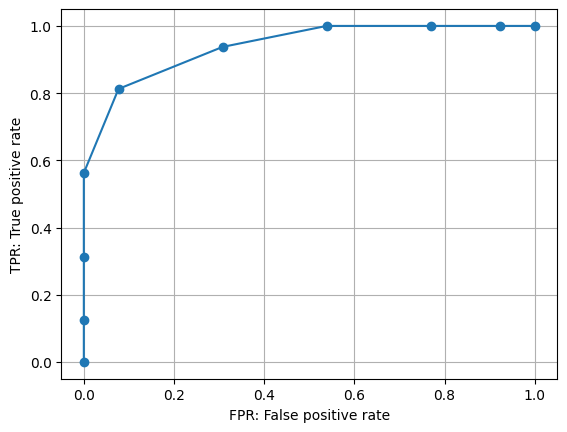

In [80]:
plt.plot(roc[0], roc[1], marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()

## AUCの算出

こちらもscikit-learnを用いれば簡単に求まる\
ROC-AUCスコアの算出にはsklearn.metricsモジュールのroc_auc_score()関数を使う


In [81]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_true, y_score)
auc

0.9399038461538461

相当高い値になるが、あくまでも例題である

# 問題1回答のヒント

問題1のみ、簡単に課題を進められるように、ヒントとして、テンプレートコードを与えるので、参考にすること

まず、wgetでネットからデータを取ってくる

wgetは、URLを指定すると、そのURLをファイルに保存するコマンドである
- pythonの機能ではなく、シェルコマンドのため!をつけること

In [82]:
!wget http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv

--2023-08-14 18:09:01--  http://class.west.sd.keio.ac.jp/dataai/data/p2data.csv
Resolving class.west.sd.keio.ac.jp (class.west.sd.keio.ac.jp)... 131.113.98.81
Connecting to class.west.sd.keio.ac.jp (class.west.sd.keio.ac.jp)|131.113.98.81|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 762 [text/csv]
Saving to: ‘p2data.csv.1’

p2data.csv.1        100%[===================>]     762  --.-KB/s    in 0s      

2023-08-14 18:09:01 (87.8 MB/s) - ‘p2data.csv.1’ saved [762/762]



ファイルをとってくると、/contentに保存され、かつ、何も指定しなければ/contentからデータが取れるので、以下のようにすればcsvファイルを取得できる

ここでは、後のことを考えてpandasの機能を使ってcsvファイルを読み込む
- 詳細は次回

In [83]:
import pandas as pd
from matplotlib import pyplot as plt
df = pd.read_csv('p2data.csv')
df.values

array([[-2.475, -1.913,  1.   ],
       [-2.436, -1.316,  1.   ],
       [-1.63 , -0.805,  1.   ],
       [-1.333, -0.658,  1.   ],
       [-0.964, -0.299,  1.   ],
       [-0.96 , -0.199,  1.   ],
       [-0.78 ,  0.162,  1.   ],
       [-0.73 ,  0.383,  1.   ],
       [-0.432,  0.412,  1.   ],
       [-0.326,  0.619,  1.   ],
       [-0.261,  0.692,  1.   ],
       [ 0.173,  0.824,  1.   ],
       [ 0.575,  1.578,  1.   ],
       [ 0.743,  1.764,  1.   ],
       [ 1.682,  1.801,  1.   ],
       [-0.596, -0.602,  0.   ],
       [-0.141, -0.172,  0.   ],
       [ 0.103, -0.071,  0.   ],
       [ 0.196,  0.108,  0.   ],
       [ 0.199,  0.314,  0.   ],
       [ 0.34 ,  0.361,  0.   ],
       [ 0.429,  0.406,  0.   ],
       [ 0.522,  0.469,  0.   ],
       [ 0.694,  0.511,  0.   ],
       [ 0.79 ,  0.52 ,  0.   ],
       [ 0.853,  0.558,  0.   ],
       [ 0.888,  0.573,  0.   ],
       [ 0.992,  0.794,  0.   ],
       [ 1.186,  0.835,  0.   ],
       [ 1.238,  0.965,  0.   ],
       [ 1

0.8未満であれば陽性という部分の記述は様々あるが、for文を使わずとも、pythonのブロードキャストを使うとシンプルになる

まずは、必要なライブラリを読み込む

In [84]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

dfに表が入っており、その値(value)の行はすべて(:)、列は0番目をとってy1_scoreに入れる。同様に1列目でy2_score、2列目でy_trueも作る。
0オリジンであることに注意。

In [85]:
y1_score = df.values[:,0]
y2_score = df.values[:,1]
y_true = df.values[:,2]

ブロードキャストを使って一気にTrue Falseテーブルを作成する
- True Falseで作成され、1/0ではないので、気になるかもしれないが、True=1、False=0であるため気にしない
- 気になる場合は、例えば、`(y1_score<0.8).astype(int)`として、1と0に変換してもよい

In [86]:
y1_scorei = y1_score<0.8
y2_scorei = y2_score<0.8

In [87]:
y1_scorei

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

In [88]:
y2_scorei

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False])

あとは、できるであろう

これをそのまま、clasification_reportに食わせるとよい